In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
# import file
nf = pd.read_csv('project1/netflix_titles.csv')

In [3]:
# file info
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
# file statistic info
nf.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [5]:
# file null info
nf.isnull().sum()/len(nf)

show_id         0.000000
type            0.000000
title           0.000000
director        0.315849
cast            0.091434
country         0.076355
date_added      0.001765
release_year    0.000000
rating          0.001604
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [6]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [7]:
# drop the non-targeted columns
nf.drop('description',axis=1,inplace=True)

# deal with type

In [8]:
nf['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

# deal with title

In [9]:
nf['title'].value_counts()

Tunnel                         3
The Silence                    3
Love                           3
Limitless                      3
Oh My Ghost                    3
                              ..
Much Loved                     1
Catching Feelings              1
Twisted Trunk, Big Fat Body    1
Elaan                          1
Meditation Park                1
Name: title, Length: 6172, dtype: int64

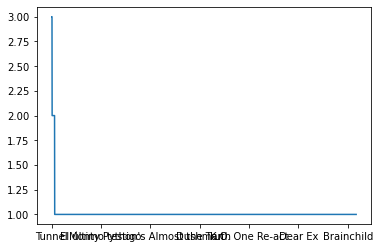

In [10]:
nf['title'].value_counts().plot()

In [11]:
# 有重名的現象
nf['title'].value_counts()[nf['title'].value_counts()==3]

Tunnel         3
The Silence    3
Love           3
Limitless      3
Oh My Ghost    3
Name: title, dtype: int64

In [12]:
nf['title'].value_counts()[nf['title'].value_counts()==2]

The In-Laws                               2
Retribution                               2
Skins                                     2
She's Gotta Have It                       2
Solo                                      2
The Oath                                  2
Carrie                                    2
The Code                                  2
Lovesick                                  2
Drive                                     2
Wet Hot American Summer                   2
The Outsider                              2
The Innocents                             2
One Day                                   2
Blood Money                               2
The Birth Reborn                          2
The Saint                                 2
Don                                       2
Bleach                                    2
The Iron Lady                             2
Godzilla                                  2
Prince                                    2
The Secret                      

In [13]:
nf[nf['title']== 'Oh My Ghost']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1155,80993625,TV Show,Oh My Ghost,NaN,"Nuengthida Sophon, Keerati Mahaprukpong, Arak ...",Thailand,"November 21, 2018",2018,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
2865,81000015,Movie,Oh My Ghost,Poj Arnon,"Kohtee Aramboy, Sudarat Butrprom, Yingsak Chon...",Thailand,"July 25, 2018",2009,TV-14,94 min,"Comedies, Horror Movies, International Movies"
4740,80178404,TV Show,Oh My Ghost,NaN,"Park Bo-young, Cho Jung-seok, Lim Ju-hwan, Kim...",South Korea,"August 8, 2019",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."


# deal with director

In [14]:
# 同個組合出現數次
nf['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
                          ..
Alexandra Dean             1
Akin Omotoso               1
Deniz Gamze Ergüven        1
Julie Dash                 1
Asim Raza                  1
Name: director, Length: 3301, dtype: int64

In [15]:
# add director amount
count = 0
director_amount_list = []
for i in nf['director']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    director_amount_list.append(comma_amount)
nf['director_count'] = director_amount_list
# nf.head()

In [16]:
# a director could be involved in mutiple shows
d_count = 0
for i in nf['director']:
    if 'Raúl Campos' in str(i):
        d_count = d_count+1
# print(d_count)

In [17]:
# split director column into mutiple columns 
for i in range(count):
    nf[f'director{i+1}']= ''
    
    
for i,d_index in zip(nf['director'],range(len(nf))):
    directors = str(i).split(',')
    for t in range(len(directors)):
        nf.iloc[d_index,12+t] = directors[t].strip()
        
# nf.head()

# deal with cast

In [18]:
# same group of casts could show multiple times
nf['cast'].value_counts()


David Attenborough                                                                                                                            18
Samuel West                                                                                                                                   10
Jeff Dunham                                                                                                                                    7
Craig Sechler                                                                                                                                  6
Jim Gaffigan                                                                                                                                   5
                                                                                                                                              ..
Chandan Roy Sanyal, Elena Kazan, Kumar Mayank, Sonia Bindra, Arfi Lamba                                                           

In [19]:
count = 0
cast_amount_list = []
for i in nf['cast']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    cast_amount_list.append(comma_amount)
print(count)
nf['cast_count'] = cast_amount_list
#nf.head()

50


In [20]:
# split cast column into mutiple columns
for i in range(count):
    nf[f'cast{i+1}']= ''
    
    
for i,d_index in zip(nf['cast'],range(len(nf))):
    casts = str(i).split(',')
    for t in range(len(casts)):
        nf.iloc[d_index,26+t] = casts[t].strip()
        
        
#nf.head()

# deal with country

In [21]:
nf['country'].value_counts()

United States                                             2032
India                                                      777
United Kingdom                                             348
Japan                                                      176
Canada                                                     141
                                                          ... 
Chile, Argentina, France, Spain, United States               1
Argentina, France, Germany                                   1
Germany, France, United States, Canada, United Kingdom       1
United Kingdom, United States, Greece, Italy, Germany        1
France, Luxembourg, Canada                                   1
Name: country, Length: 554, dtype: int64

In [22]:
count = 0
country_amount_list = []
for i in nf['country']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    country_amount_list.append(comma_amount)
    
nf['country_count'] = country_amount_list
# nf.head()

In [23]:
# split country column into multiple columns
for i in range(count):
    nf[f'country{i+1}']= ''
    
    
for i,d_index in zip(nf['country'],range(len(nf))):
    countries = str(i).split(',')
    for t in range(len(countries)):
        nf.iloc[d_index,-12+t] = countries[t].strip()
        
        
# nf.head()

# deal with dateadded

In [24]:
# deal with null
nf[['date_added']].replace('nan',np.nan)
# nf[['date_added']].head()

,date_added
0,"September 9, 2019"
1,"September 9, 2016"
2,"September 8, 2018"
3,"September 8, 2018"
4,"September 8, 2017"
...,...
6229,NaN
6230,NaN
6231,NaN
6232,NaN


In [25]:
# make the time in date_added column in a consistent format
nf['date_added'][:-11] = nf['date_added'][:-11].apply(lambda x: datetime.datetime.strptime(x.strip(), '%B %d, %Y').strftime("%Y/%m/%d"))
# nf.head()

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# deal with year

In [26]:
# check the year column
sorted_year = nf['release_year'].unique()
sorted_year.sort()
# sorted_year


In [27]:
nf[nf['release_year']==1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
4292,81030762,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018/12/30,1925,TV-PG,1 Season,...,,,,,,,,,,


# deal with list_in

In [28]:
nf['listed_in'].value_counts()

Documentaries                                                  299
Stand-Up Comedy                                                273
Dramas, International Movies                                   248
Dramas, Independent Movies, International Movies               186
Comedies, Dramas, International Movies                         174
                                                              ... 
Classic & Cult TV, TV Sci-Fi & Fantasy                           1
TV Comedies, TV Sci-Fi & Fantasy, Teen TV Shows                  1
Kids' TV, TV Action & Adventure, TV Dramas                       1
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Reality TV, TV Horror, TV Thrillers                              1
Name: listed_in, Length: 461, dtype: int64

In [29]:
# add listed_in_amount_list column
count = 0
listed_in_amount_list = []
for i in nf['listed_in']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    listed_in_amount_list.append(comma_amount)
# print(count)
nf['listed_in_amount'] = listed_in_amount_list
# nf.head()

In [30]:
# split the listed_in column into multiple columns
for i in range(count):
    nf[f'listed_in{i+1}']= ''
    
    
for i,d_index in zip(nf['listed_in'],range(len(nf))):
    listed_in = str(i).split(',')
    for t in range(len(listed_in)):
        nf.iloc[d_index,-3+t] = listed_in[t].strip()
        

        
        
# nf.head()

# Questions

# 1. movie/tvshow by year
- netflix started increasing the numbers of movies and tv shows in 2015.
- the increacement of movies is larger

In [31]:
nf['add_year'] = nf['date_added'].apply(lambda x: str(x).split('/')[0] if x !=None else None)

In [32]:
nf['count'] = 1
movie = nf[nf['type']=='Movie']['add_year'].value_counts()
tv_show = nf[nf['type']=='TV Show']['add_year'].value_counts()

In [33]:
movie = movie.reset_index()
movie.rename(columns={'index':'add_year','add_year':'count'},inplace=True)
movie.reset_index(drop=True)
movie.drop(movie[movie['add_year']=='nan'].index,inplace=True)
movie = movie.sort_values('add_year')

In [34]:
tv_show = tv_show.reset_index()
tv_show.rename(columns={'index':'add_year','add_year':'count'},inplace=True)
tv_show.reset_index(drop=True)
tv_show = tv_show.sort_values('add_year')
tv_show.drop(tv_show[tv_show['add_year']=='nan'].index,inplace=True)

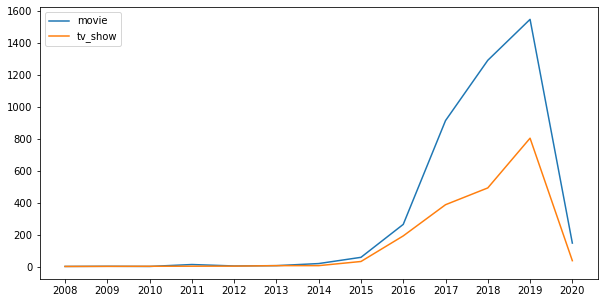

In [35]:
plt.figure(figsize= (10,5))
plt.plot(movie['add_year'],movie['count'],label = 'movie')
plt.plot(tv_show['add_year'],tv_show['count'],label='tv_show')
plt.legend()

# 2. listed_in amount by year
- the genre of tv_shows/movies are getting more and more diverse 

In [36]:
listed_amount = nf[['add_year','listed_in1','listed_in2','listed_in3']]
#listed_amount

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

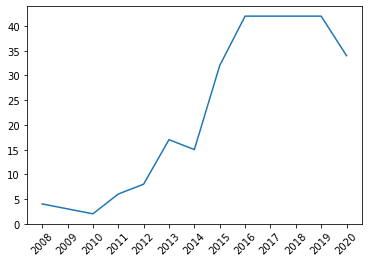

In [37]:
listed_list_dict = {}
for d in range(2008,2021):
    listed_list = []
    target = listed_amount[listed_amount['add_year']==str(d)]
    for i in range(target.shape[0]):
        for j in range(1,target.shape[1]):
            if target.iloc[i,j] not in listed_list:
                if target.iloc[i,j] !="":
                    listed_list.append(target.iloc[i,j])
    listed_list_dict.update({str(d):len(listed_list)})
    df = pd.DataFrame.from_dict(listed_list_dict, orient='index')
    
plt.plot(df.index,df[0])
plt.xticks(rotation=45)
    

# 3. the top 5 genres
 the top 5 genres are:
- International Movies          
- Dramas                        
- Comedies                      
- International TV Shows        
- Documentaries                  

In [38]:
from collections import Counter

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

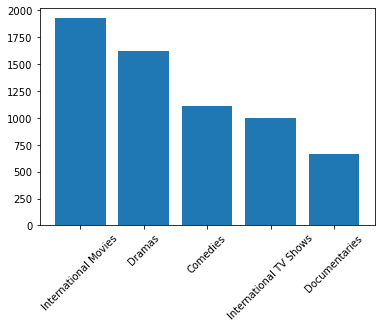

In [39]:
listed_dict = {}
target = listed_amount
for i in range(target.shape[0]):
    for j in range(1,target.shape[1]):
        if target.iloc[i,j] not in listed_dict:
            listed_dict.update({target.iloc[i,j]:1})
        else:
            listed_dict[target.iloc[i,j]]=listed_dict[target.iloc[i,j]]+1
del listed_dict['']


df = pd.DataFrame.from_dict(listed_dict, orient='index')
df.sort_values(0,inplace=True,ascending = False)
#print(df)

c = Counter(listed_dict)
top5 = c.most_common(5)



x = [i[0] for i in top5]
y = [i[1] for i in top5]
plt.bar(x,y)
plt.xticks(rotation=45)

    

# 4. movie duration and year
- the durations of movies are getting longer 

In [40]:
target = nf[nf['type']=='Movie'][['add_year','duration','type']]
target['duration'] = target['duration'].apply(lambda x: int(x.split(' min')[0]))
target.drop(target[target['add_year']=='nan'].index,inplace=True)
temp = target.groupby('add_year').mean()

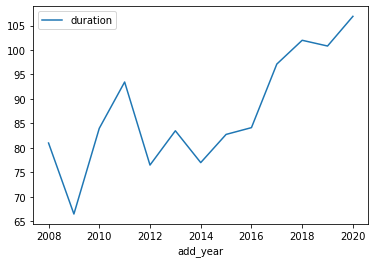

In [41]:
temp.plot()

# 5. tv rating amount by year
- from 2008 to 2020 more and more shows are for 18+ years old people

In [42]:
target = nf[['add_year','rating']]
rating_list = list(target['rating'].unique())
#rating_list

In [43]:
listed_dict = {}
for i in rating_list:
    listed_dict.update({i:0})
reset_dict = listed_dict

In [44]:
df = pd.DataFrame.from_dict(listed_dict, orient='index')
#df.head()

In [45]:
for d in range(2008,2021):
    listed_dict = reset_dict.copy()
    rating =  target[target['add_year']==str(d)]
    for i in range(rating.shape[0]):
        for j in range(1,rating.shape[1]):
            rate = rating.iloc[i,j]
            if rate != '':              
                count = listed_dict[rate]
                listed_dict[rate]= count+1
    df[d] = pd.DataFrame.from_dict(listed_dict, orient='index')

In [46]:
df = df.drop(0,axis=1)

In [47]:
tv =['TV-Y','TV-Y7','TV-Y7-FV','TV-G','TV-PG','TV-MA']

In [48]:
sum_df = df.copy()
sum_df = sum_df/sum_df.sum()

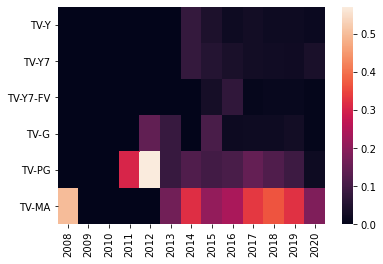

In [49]:
sns.heatmap(sum_df.loc[tv])

# 6. tv rating by country
# china vs US

In [50]:
target = nf[['add_year','rating','country']]
target['china'] = target['country'].apply(lambda x: 1 if 'China' in str(x) else 0)
target['us'] = target['country'].apply(lambda x: 1 if 'United States' in str(x) else 0)

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
rating_list = list(target['rating'].unique())

In [52]:
listed_dict = {}
for i in rating_list:
    listed_dict.update({i:0})
reset_dict = listed_dict

In [53]:
ch_df = pd.DataFrame.from_dict(listed_dict, orient='index')
us_df = pd.DataFrame.from_dict(listed_dict, orient='index')


In [54]:
ch_listed_dict = reset_dict.copy()
us_listed_dict = reset_dict.copy()
ch_rating = target[target['china']==1]
us_rating = target[target['us']==1]
for i in range(ch_rating.shape[0]):
    for j in range(1,ch_rating.shape[1]-3):
        rate = ch_rating.iloc[i,j]
        if rate != '':              
            count = ch_listed_dict[rate]                    
            ch_listed_dict[rate]= count+1
for i in range(us_rating.shape[0]):
    for j in range(1,us_rating.shape[1]-3):
        rate = us_rating.iloc[i,j]
        if rate != '':              
            count = us_listed_dict[rate]                    
            us_listed_dict[rate]= count+1            
                
ch_df[d] = pd.DataFrame.from_dict(ch_listed_dict, orient='index')
us_df[d] = pd.DataFrame.from_dict(us_listed_dict, orient='index')

In [55]:
ch_df = ch_df.drop(0,axis=1).rename(columns={2020:'count'})
us_df = us_df.drop(0,axis=1).rename(columns={2020:'count'})

In [56]:
ch_df = ch_df.loc[tv]
us_df = us_df.loc[tv]

In [57]:
ch_df = ch_df/ch_df.sum()
us_df = us_df/us_df.sum()

In [58]:
ch_df['country'] = 'china'
us_df['country'] = 'us'

In [59]:
df = pd.concat([ch_df,us_df],axis=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

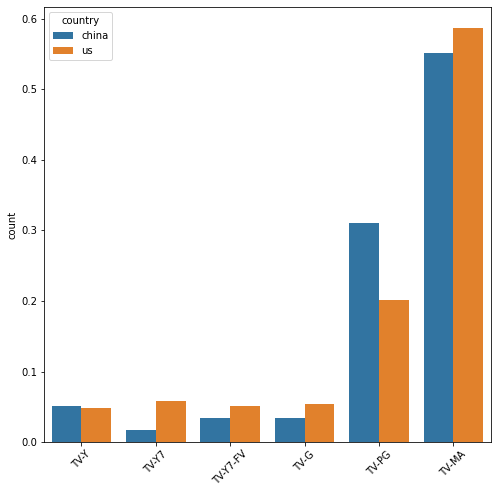

In [60]:
plt.figure(figsize=(8,8))
sns.barplot(x = df.index , y =df['count'],hue=df.country)
plt.xticks(rotation=45)

# 6. yearly tv rating by country 
# china vs US
- Netflix usually starts their new service in a new market with adult oriented shows
- like 2008 in US, 2014 in Uk, and 2016 in China

In [61]:
target = nf[['add_year','rating','country']]
target['china'] = target['country'].apply(lambda x: 1 if 'China' in str(x) else 0)
target['us'] = target['country'].apply(lambda x: 1 if 'United States' in str(x) else 0)
target['uk']=target['country'].apply(lambda x: 1 if 'United Kingdom' in str(x) else 0)

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [62]:
rating_list = list(target['rating'].unique())

In [63]:
listed_dict = {}
for i in rating_list:
    listed_dict.update({i:0})
reset_dict = listed_dict

In [64]:
ch_df = pd.DataFrame.from_dict(listed_dict, orient='index')
us_df = pd.DataFrame.from_dict(listed_dict, orient='index')
uk_df = pd.DataFrame.from_dict(listed_dict, orient='index')

In [65]:
for d in range(2008,2021):
    ch_listed_dict = reset_dict.copy()
    us_listed_dict = reset_dict.copy()
    uk_listed_dict = reset_dict.copy()
    ch_rating = target[(target['china']==1)&(target['add_year']==str(d))]
    us_rating = target[(target['us']==1)&(target['add_year']==str(d))]
    uk_rating = target[(target['uk']==1)&(target['add_year']==str(d))]
    for i in range(ch_rating.shape[0]):
        for j in range(1,ch_rating.shape[1]-4):
            rate = ch_rating.iloc[i,j]
            if rate != '':              
                count = ch_listed_dict[rate]                    
                ch_listed_dict[rate]= count+1
    for i in range(us_rating.shape[0]):
        for j in range(1,us_rating.shape[1]-4):
            rate = us_rating.iloc[i,j]
            if rate != '':              
                count = us_listed_dict[rate]                    
                us_listed_dict[rate]= count+1  
    for i in range(uk_rating.shape[0]):
        for j in range(1,us_rating.shape[1]-4):
            rate = uk_rating.iloc[i,j]
            if rate != '':              
                count = uk_listed_dict[rate]                    
                uk_listed_dict[rate]= count+1  

    ch_df[d] = pd.DataFrame.from_dict(ch_listed_dict, orient='index')
    us_df[d] = pd.DataFrame.from_dict(us_listed_dict, orient='index')
    uk_df[d] = pd.DataFrame.from_dict(uk_listed_dict, orient='index')
    

In [66]:
tv =['TV-Y','TV-Y7','TV-Y7-FV','TV-G','TV-PG','TV-MA']
ch_df = ch_df.loc[tv].drop(0,axis=1)
us_df = us_df.loc[tv].drop(0,axis=1)
uk_df = uk_df.loc[tv].drop(0,axis=1)

In [67]:
ch_df = (ch_df/ch_df.sum()).fillna(0)
us_df = (us_df/us_df.sum()).fillna(0)
uk_df = (uk_df/uk_df.sum()).fillna(0)

In [68]:
ch_df = ch_df.reindex(tv)
us_df = us_df.reindex(tv)
uk_df = uk_df.reindex(tv)

In [69]:
ch_df['country'] = 'ch'
us_df['country'] = 'us'
uk_df['country'] = 'uk'

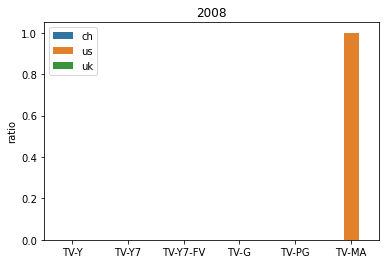

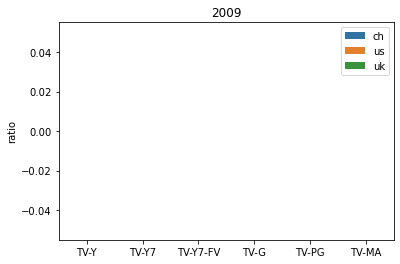

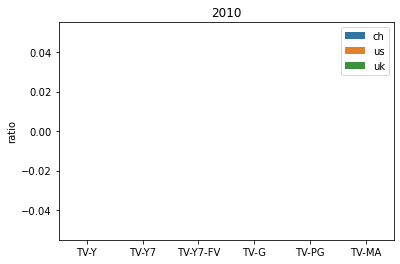

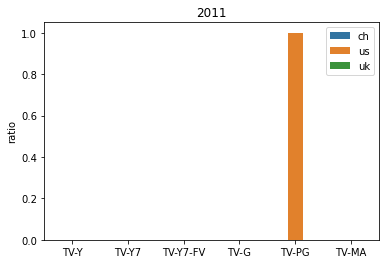

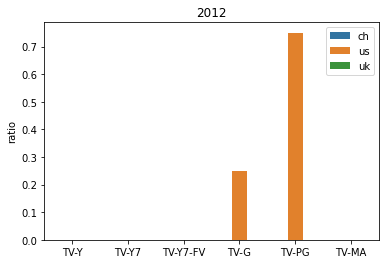

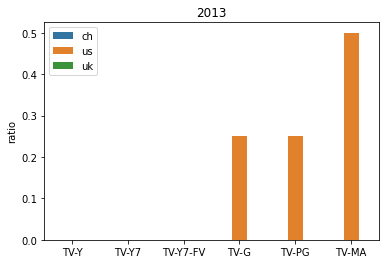

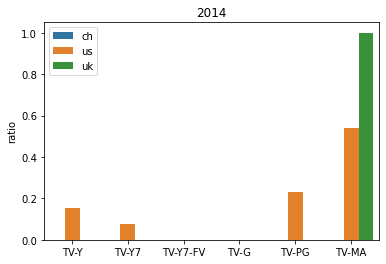

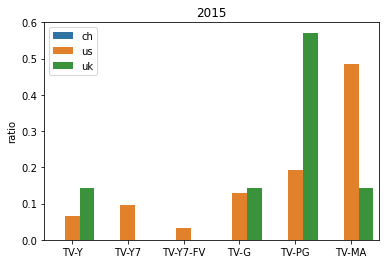

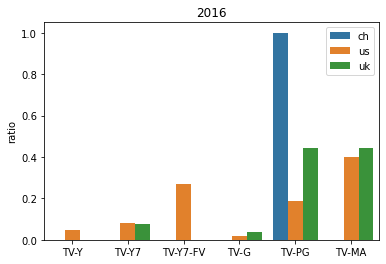

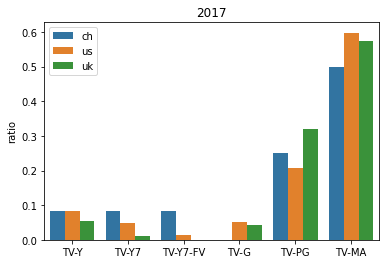

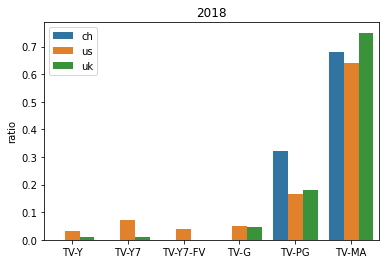

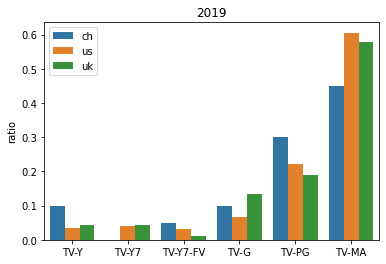

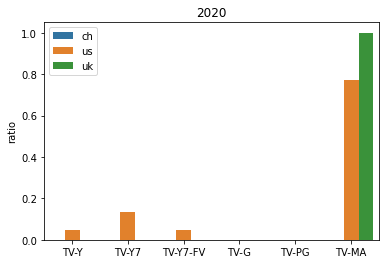

In [70]:
for d in range(2008,2021):
    df = pd.concat([ch_df[[d,'country']],us_df[[d,'country']],uk_df[[d,'country']]],axis=0)
    sns.barplot(x = df.index,y = df[d],hue=df['country'])
    plt.title(d)
    plt.ylabel('ratio')
    plt.legend()
    plt.show()